In [1]:
import numpy as np
import json

import matplotlib.pyplot as plt
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

# Load hit results

with open('./responses.json', 'r') as f:
    results = json.load(f)

print(results)

[{'HITId': '3S37Y8CWI8H5SH1IPJI50XH6TIDW47', 'workerId': 'ACUP2HVXGZY46', 'results': {'inputs': [], 'outputs': [['600,400,./files/certificates_1_13_MACS70yIlqs.png:3,2,1,258.35,117.5,258.35,118.35,258.35,120.85,258.35,123.35,258.35,128.35,258.35,130,258.35,132.5,258.35,135,258.35,137.5,258.35,140,258.35,145.85,260.85,150,260.85,155,260.85,160.85,260.85,165,260.85,170.85,260.85,175,260.85,178.35,260.85,185,260.85,190,260.85,193.35,262.5,198.35,263.35,203.35,265,205.85,265,208.35,265.85,208.35,265.85,213.35,265.85,215.85,265.85,218.35,265.85,222.5,265.85,225.85,265.85,230,265.85,235,265.85,240,265.85,243.35,265.85,245,265.85,248.35,265.85,250.85,265.85,255,265,258.35,263.35,260,263.35,263.35,263.35,265.85,262.5,268.35,260.85,270.85,260,273.35,260,275.85,260,278.35,258.35,282.5,258.35,283.35,258.35,285.85,258.35,288.35,258.35,290,258.35,290.85,258.35,292.5,258.35,293.35,260,293.35,262.5,295,263.35,295,265,295.85,265.85,295.85,267.5,295.85,268.35,295.85,270.85,295.85,272.5,295.85,275.85,29

In [13]:
def extract_hit_info(r):
    HITId = r['HITId']
    workerId = r['workerId']
    polygons_images = r['results']['outputs'][0]
    feedback = r['feedback']
    
    p_list = {}
    for polys in polygons_images:
        data = polys.split(':')
        
        size_name = data[0].split(',')
        size = (int(size_name[0]),int(size_name[1]))
        name = size_name[2]
        
        p_list[name] = dict(size=size, points=data[1].split(';')[:-1])
        
    return HITId, workerId, p_list, feedback
    
    
    
def visualize_polygons(img_name, size, points, prefix_files =True):
    if prefix_files:
        image = Image.open(img_name[2:])
    else:
        image = Image.open(img_name)
    
    image = image.convert('RGB')
    draw = ImageDraw.Draw(image, 'RGBA')
    
    image = draw_polygons(image,draw,size,points,fill=(255,0,0,100))
    
    plt.figure(figsize=(15,15))
    plt.imshow(image)
    

def draw_polygons(image, draw, size, points, fill=1):
    
    factor_x = image.width/(size[0])
    factor_y = image.height/(size[1])
    
    marg_x = -10*factor_x
    marg_y = -10*factor_y
    
    for p in points:
        p = p.split(',')
        pts = [(float(p[i])*factor_x+marg_x, float(p[i+1])*factor_y+marg_y) for i in range(3,len(p)-3,2)]
        draw.polygon(pts, fill=fill)
    
    return image
    
def average_save_labels(img_name, size, point_arrays, prefix_files=True, save_path=None):
    
    # TODO: FINISH THIS FUNCTION
    
    if prefix_files:
        image = Image.open('./files/'+img_name[2:])
    else:
        image = Image.open(img_name)
    
    
    masks = np.zeros((image.width, image.height))
    
    for pts in point_arrays:
        mask = Image.new('L', (image.width, image.height), 0)
        draw = ImageDraw.Draw(mask)
        mask = draw_polygons(mask, draw, size, points, fill=1)
        mask = numpy.array(mask)
        
        masks+=mask
    
#     masks/=
    
    im = Image.fromarray(masks)
    im.save(save_path)
    
    
def average_with_existing(existing, save_path=None):
    pass
    

{'./files/certificates_1_13_MACS70yIlqs.png': {'size': (600, 400), 'points': ['3,2,1,258.35,117.5,258.35,118.35,258.35,120.85,258.35,123.35,258.35,128.35,258.35,130,258.35,132.5,258.35,135,258.35,137.5,258.35,140,258.35,145.85,260.85,150,260.85,155,260.85,160.85,260.85,165,260.85,170.85,260.85,175,260.85,178.35,260.85,185,260.85,190,260.85,193.35,262.5,198.35,263.35,203.35,265,205.85,265,208.35,265.85,208.35,265.85,213.35,265.85,215.85,265.85,218.35,265.85,222.5,265.85,225.85,265.85,230,265.85,235,265.85,240,265.85,243.35,265.85,245,265.85,248.35,265.85,250.85,265.85,255,265,258.35,263.35,260,263.35,263.35,263.35,265.85,262.5,268.35,260.85,270.85,260,273.35,260,275.85,260,278.35,258.35,282.5,258.35,283.35,258.35,285.85,258.35,288.35,258.35,290,258.35,290.85,258.35,292.5,258.35,293.35,260,293.35,262.5,295,263.35,295,265,295.85,265.85,295.85,267.5,295.85,268.35,295.85,270.85,295.85,272.5,295.85,275.85,295.85,280,295.85,283.35,295.85,287.5,295.85,290.85,295.85,293.35,295.85,298.35,295.85,

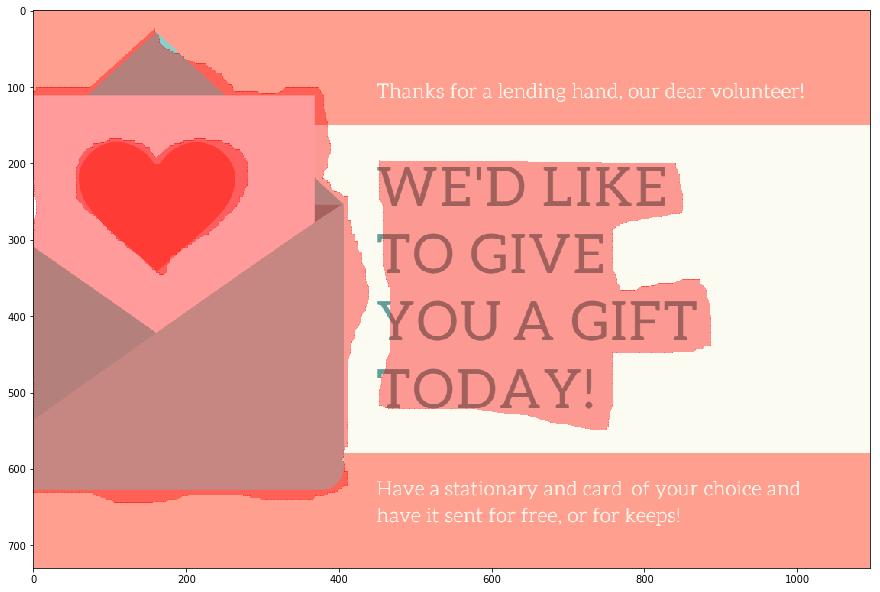

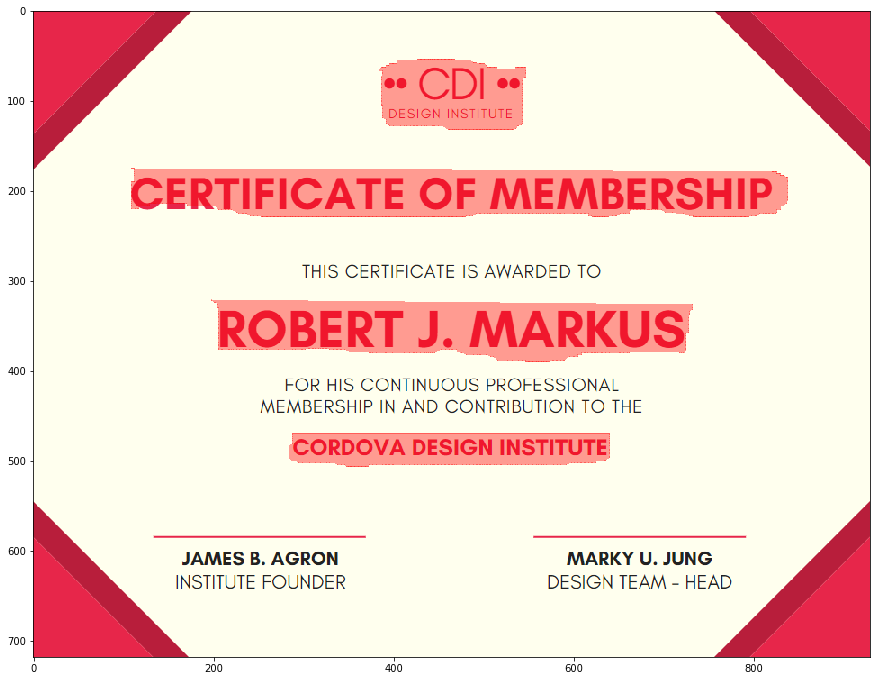

In [16]:
HITId, workerId, p_dict, feedback = extract_hit_info(results[0])

print(p_dict)

for name, pts in p_dict.items():
    # Pts are dictionary of size, points
    size = pts['size']
    p = pts['points']
    
    visualize_polygons(name, size, p)